In [116]:
import numpy as np


In [117]:
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')


In [118]:
print("Dimensions de ratings_train:", ratings_train.shape)
print("Dimensions de ratings_test:", ratings_test.shape)
print("Dimensions de namegenres:", namegenres.shape)
print("Dimensions de list_index_wanted:", list_index_wanted.shape)


Dimensions de ratings_train: (610, 4980)
Dimensions de ratings_test: (610, 4980)
Dimensions de namegenres: (4980, 2)
Dimensions de list_index_wanted: (31598, 2)


In [119]:
import numpy as np

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)  # Si le fichier contient des données de types variés
list_index_wanted = np.load('list_index_wanted.npy')

# Afficher un aperçu des données
print("Aperçu de ratings_train:", ratings_train[:5])  # Affiche les 5 premières lignes
print("Aperçu de ratings_test:", ratings_test[:5])    # Affiche les 5 premières lignes
print("Aperçu de namegenres:", namegenres[:5])        # Affiche les 5 premières lignes
print("Aperçu de list_index_wanted:", list_index_wanted[:5])  # Affiche les 5 premières lignes


Aperçu de ratings_train: [[ 4. nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Aperçu de ratings_test: [[nan nan  4. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [ 4. nan nan ... nan nan nan]]
Aperçu de namegenres: [['Toy Story (1995)' 'Adventure|Animation|Children|Comedy|Fantasy']
 ['Jumanji (1995)' 'Adventure|Children|Fantasy']
 ['Grumpier Old Men (1995)' 'Comedy|Romance']
 ['Waiting to Exhale (1995)' 'Comedy|Drama|Romance']
 ['Father of the Bride Part II (1995)' 'Comedy']]
Aperçu de list_index_wanted: [[  0  42]
 [  0 237]
 [  0 250]
 [  0 261]
 [  0 265]]


In [120]:
# Compter le nombre de notes non-nulles dans chaque dataset
ratings_train_count = np.count_nonzero(~np.isnan(ratings_train))
ratings_test_count = np.count_nonzero(~np.isnan(ratings_test))

print(f"Nombre de notes dans ratings_train : {ratings_train_count}")
print(f"Nombre de notes dans ratings_test : {ratings_test_count}")


Nombre de notes dans ratings_train : 31598
Nombre de notes dans ratings_test : 31598


In [121]:
import numpy as np

def analyze_data(ratings_train, ratings_test, namegenres):
    # Afficher les formes des matrices
    print("Forme de la matrice d'entraînement:", ratings_train.shape)
    print("Forme de la matrice de test:", ratings_test.shape)
    print("Nombre de films et leurs genres:", namegenres.shape)

    # Calcul du pourcentage de valeurs manquantes dans la matrice d'entraînement
    total_elements = ratings_train.size
    missing_elements = np.isnan(ratings_train).sum()
    missing_percentage = (missing_elements / total_elements) * 100
    print(f"\nPourcentage de valeurs manquantes dans train: {missing_percentage:.2f}%")

In [122]:
# Calculer le taux de valeurs manquantes dans la matrice de notation
num_missing = np.isnan(ratings_train).sum()
total_values = ratings_train.size
missing_rate = (num_missing / total_values) * 100

print(f"Taux de valeurs manquantes dans ratings_train: {missing_rate:.2f}%")


Taux de valeurs manquantes dans ratings_train: 98.96%


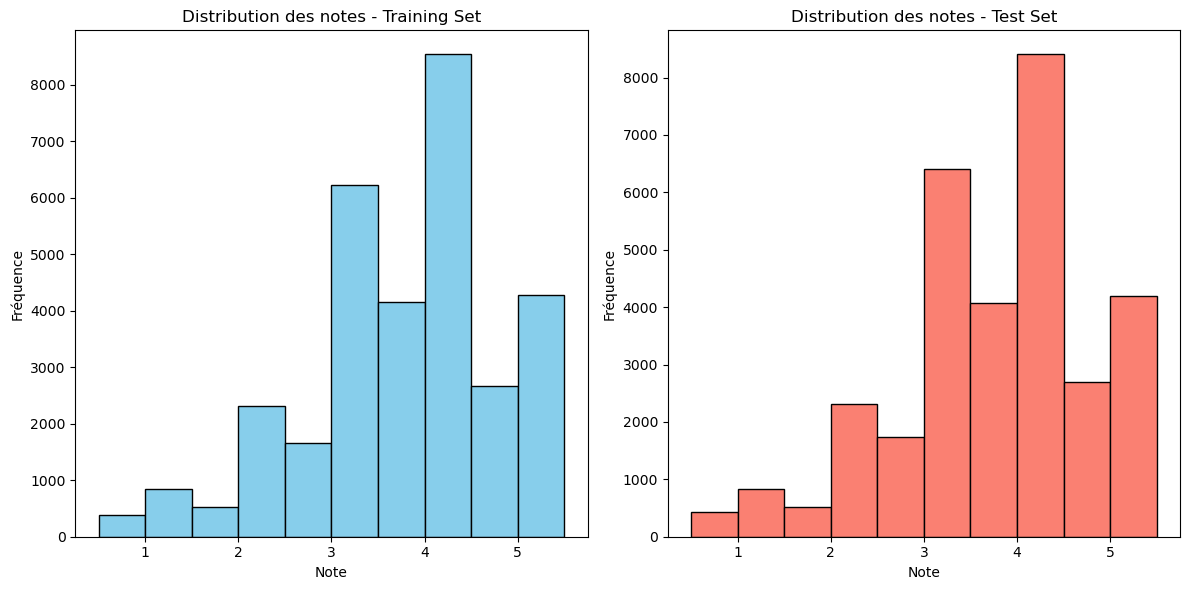

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Remplacer les NaN par 0 pour faciliter la visualisation
ratings_train_non_nan = np.nan_to_num(ratings_train, nan=0).flatten()
ratings_test_non_nan = np.nan_to_num(ratings_test, nan=0).flatten()

# Filtrer les notes supérieures à 0 (supposant que 0 signifie absence de note)
ratings_train_non_nan = ratings_train_non_nan[ratings_train_non_nan > 0]
ratings_test_non_nan = ratings_test_non_nan[ratings_test_non_nan > 0]

# Créer l'histogramme
plt.figure(figsize=(12, 6))

# Histogramme pour ratings_train
plt.subplot(1, 2, 1)
plt.hist(ratings_train_non_nan, bins=np.arange(0.5, 6, 0.5), color='skyblue', edgecolor='black')
plt.title("Distribution des notes - Training Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

# Histogramme pour ratings_test
plt.subplot(1, 2, 2)
plt.hist(ratings_test_non_nan, bins=np.arange(0.5, 6, 0.5), color='salmon', edgecolor='black')
plt.title("Distribution des notes - Test Set")
plt.xlabel("Note")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()


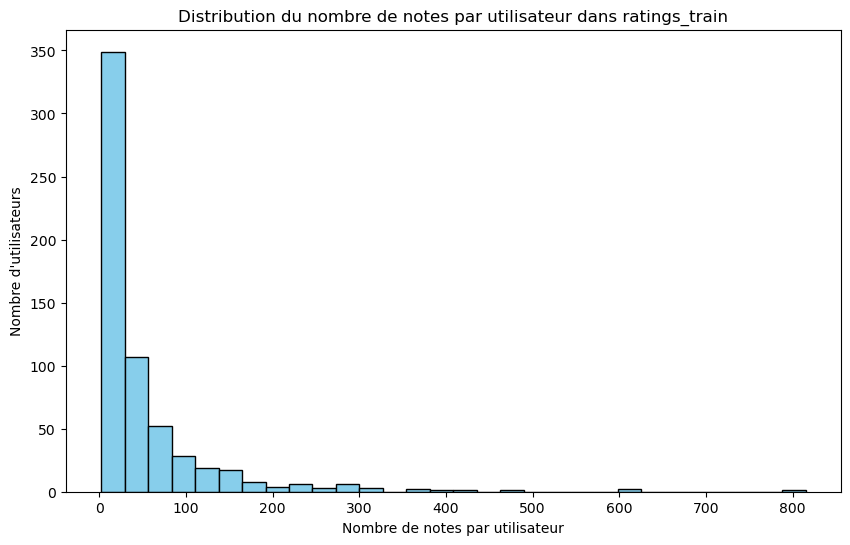

In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Calculer le nombre de notes par utilisateur dans ratings_train
# Assumant que chaque ligne est un utilisateur
notes_par_utilisateur = np.count_nonzero(~np.isnan(ratings_train), axis=1)

# Créer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(notes_par_utilisateur, bins=30, color="skyblue", edgecolor="black")
plt.xlabel("Nombre de notes par utilisateur")
plt.ylabel("Nombre d'utilisateurs")
plt.title("Distribution du nombre de notes par utilisateur dans ratings_train")
plt.show()


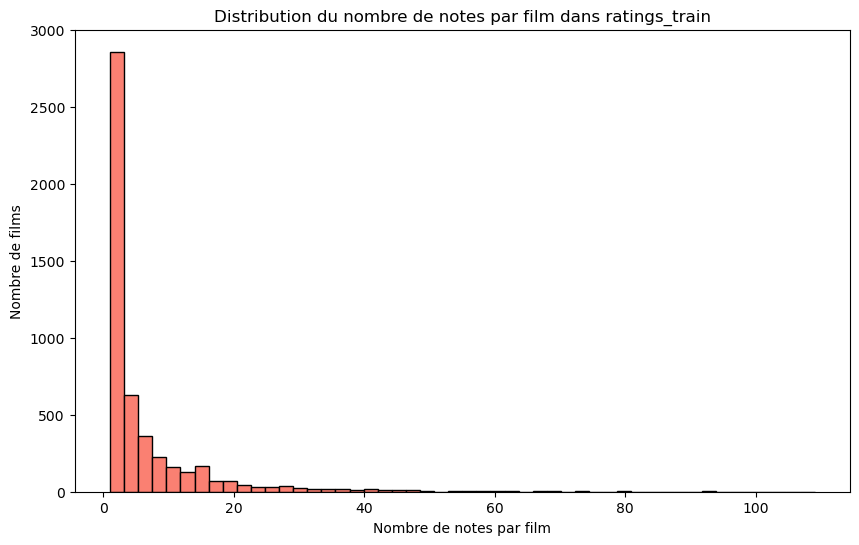

In [125]:

# Compter le nombre de notes par film (colonne)
film_counts = np.count_nonzero(~np.isnan(ratings_train), axis=0)

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(film_counts, bins=50, color='salmon', edgecolor='black')
plt.xlabel("Nombre de notes par film")
plt.ylabel("Nombre de films")
plt.title("Distribution du nombre de notes par film dans ratings_train")
plt.show()


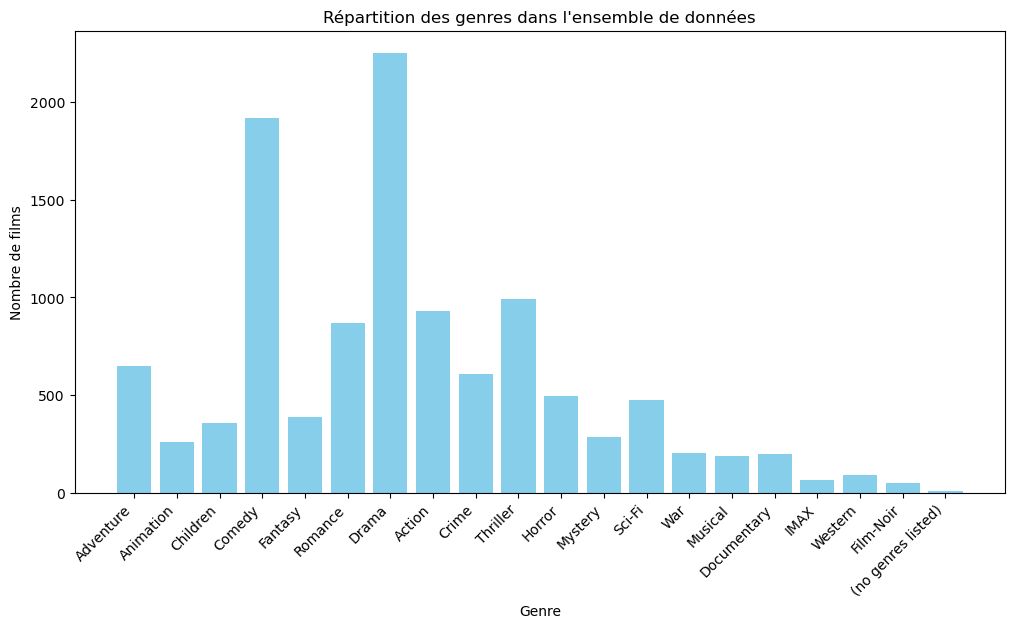

In [126]:
from collections import Counter

# Extraire les genres et compter leur fréquence
genres = [genre for sublist in namegenres[:, 1] for genre in sublist.split('|')]
genre_counts = Counter(genres)

# Créer le graphique en barres
plt.figure(figsize=(12, 6))
plt.bar(genre_counts.keys(), genre_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Nombre de films")
plt.title("Répartition des genres dans l'ensemble de données")
plt.show()

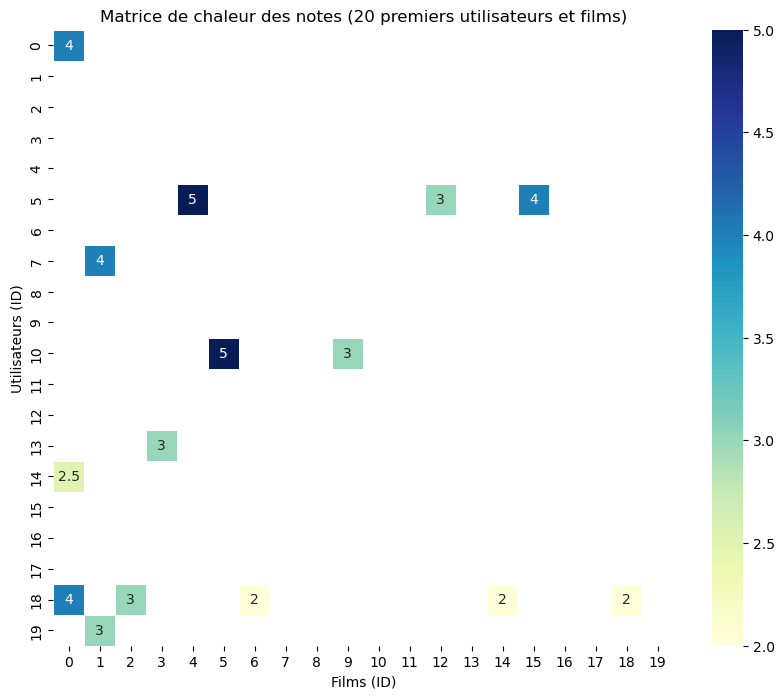

In [127]:
import seaborn as sns

# Extraire une sous-matrice de ratings_train pour les 20 premiers utilisateurs et les 20 premiers films
ratings_sample = ratings_train[:20, :20]

# Créer la matrice de chaleur
plt.figure(figsize=(10, 8))
sns.heatmap(ratings_sample, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.xlabel("Films (ID)")
plt.ylabel("Utilisateurs (ID)")
plt.title("Matrice de chaleur des notes (20 premiers utilisateurs et films)")
plt.show()

# Système de Recommandation Hybride

In [128]:
import numpy as np
from tensorflow.keras.layers import Dropout, Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.callbacks import EarlyStopping

# Charger les données
ratings_train = np.nan_to_num(np.load('ratings_train.npy'), nan=0)
ratings_test = np.nan_to_num(np.load('ratings_test.npy'), nan=0)
namesngenre = np.load('namesngenre.npy', allow_pickle=True)

num_users, num_items = ratings_train.shape
embedding_dim = 100  # Dimension des embeddings

# Encodage des genres
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(namesngenre)

# Embeddings pour le collaborative filtering
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Embeddings pour le content-based filtering
genre_input = Input(shape=(genres_encoded.shape[1],), name='genre_input')

# Fusion des embeddings
merged = Concatenate()([user_vector, item_vector, genre_input])

# Couches du modèle hybride
dense = Dense(256, activation='relu', kernel_regularizer='l2')(merged)
dense = Dropout(0.3)(dense)
dense = Dense(128, activation='relu', kernel_regularizer='l2')(dense)
dense = Dropout(0.3)(dense)
output = Dense(1, activation='linear')(dense)

# Créer et compiler le modèle hybride
hybrid_model = Model(inputs=[user_input, item_input, genre_input], outputs=output)
hybrid_model.compile(optimizer=Adam(learning_rate=0.00005), loss='mean_squared_error')

# Préparation des données pour l'entraînement
user_ids_train = np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
item_ids_train = np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
genres_train = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])

train_data = [user_ids_train, item_ids_train, genres_train]

# Entraîner le modèle hybride
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hybrid_model.fit(train_data, train_ratings, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Évaluation sur le jeu d'entraînement
predicted_ratings_train = hybrid_model.predict(train_data)
rmse_train_hybrid = np.sqrt(mean_squared_error(train_ratings, predicted_ratings_train))
r2_train_hybrid = r2_score(train_ratings, predicted_ratings_train)
print("RMSE (Entraînement - Hybride) :", rmse_train_hybrid)
print("R² (Entraînement - Hybride) :", r2_train_hybrid)

# Préparation des données de test
user_ids_test = np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
item_ids_test = np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
genres_test = np.array([genres_encoded[j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

test_data = [user_ids_test, item_ids_test, genres_test]

# Prédire les notes pour le jeu de test
predicted_ratings_test = hybrid_model.predict(test_data)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_hybrid = np.sqrt(mean_squared_error(test_ratings, predicted_ratings_test))
r2_test_hybrid = r2_score(test_ratings, predicted_ratings_test)

print("RMSE (Test - Hybride) :", rmse_test_hybrid)
print("R² (Test - Hybride) :", r2_test_hybrid)


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input', 'genre_input']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 16.5123 - val_loss: 5.7331
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.9818 - val_loss: 3.7690
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.8183 - val_loss: 3.0905
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.2697 - val_loss: 2.6577
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.9283 - val_loss: 2.3625
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.6530 - val_loss: 2.1066
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.4603 - val_loss: 1.9500
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.3224 - val_loss: 1.7738
Epoch 9/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.2084 - val_loss: 1.7161
Epoch 10/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.1010 - val_loss: 1.6129
Epoch 11/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0511 - val_loss: 1.5571
Epoch 12/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0

# Méthode SVD

In [129]:
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

In [130]:
train_data = [
    (i+1, j+1, ratings_train_matrix[i, j])
    for i in range(ratings_train_matrix.shape[0])
    for j in range(ratings_train_matrix.shape[1])
    if ratings_train_matrix[i,j] != 0
]

In [131]:
import numpy as np
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise import accuracy

# Création du reader avec l'échelle de notation
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))

# Transformation de `train_data` en DataFrame avec les colonnes appropriées
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])

# Chargement du dataset avec surprise
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [132]:
parameters = {"n_factors": [150, 200, 300], "reg_all": [0.01, 0.1, 0.2, 0.5, 0.8], "lr_all": [0.01, 0.02, 0.03, 0.04, 0.05, 0.09]}


In [133]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])


Meilleurs paramètres : {'n_factors': 200, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.8878518869911829


In [134]:
from surprise.model_selection import GridSearchCV

# Modèle de recommandation avec SVD et recherche de grille
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params["rmse"])
print("Meilleur RMSE :", grid_search.best_score["rmse"])

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator["rmse"]

# Générer les prédictions pour les indices souhaités
predicted_ratings = []
for user_index, product_index in list_index_wanted:
    pred = best_model.predict(user_index, product_index)
    predicted_ratings.append((user_index, product_index, pred.est))

# Affichage des prédictions
for prediction in predicted_ratings:
    print(f"Utilisateur {prediction[0]}, Produit {prediction[1]}, Note prédite : {prediction[2]}")


Meilleurs paramètres : {'n_factors': 200, 'reg_all': 0.2, 'lr_all': 0.02}
Meilleur RMSE : 0.8876666835434192
Utilisateur 0, Produit 42, Note prédite : 3.2508627292897923
Utilisateur 0, Produit 237, Note prédite : 3.321719691001724
Utilisateur 0, Produit 250, Note prédite : 3.5504011955317765
Utilisateur 0, Produit 261, Note prédite : 3.132842892401864
Utilisateur 0, Produit 265, Note prédite : 3.495696458493128
Utilisateur 0, Produit 352, Note prédite : 3.6741690739542623
Utilisateur 0, Produit 372, Note prédite : 3.4617814957682658
Utilisateur 0, Produit 387, Note prédite : 3.238208947067018
Utilisateur 0, Produit 393, Note prédite : 3.7213226391038416
Utilisateur 0, Produit 421, Note prédite : 3.6997117242904296
Utilisateur 0, Produit 475, Note prédite : 3.8198916340734987
Utilisateur 0, Produit 502, Note prédite : 3.2569980067590762
Utilisateur 0, Produit 555, Note prédite : 4.089583158412224
Utilisateur 0, Produit 572, Note prédite : 4.082305753103535
Utilisateur 0, Produit 585, No

In [135]:
import pandas as pd

# Création de test_data en tant que DataFrame directement avec les colonnes nécessaires
test_data = [
    (i + 1, j + 1, ratings_test_matrix[i, j])
    for i in range(ratings_test_matrix.shape[0])
    for j in range(ratings_test_matrix.shape[1])
    if ratings_test_matrix[i, j] != 0
]

# Conversion en DataFrame avec les colonnes 'user_id', 'item_id', 'rating'
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])

# Utilisation du DataFrame avec Dataset.load_from_df
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset()


In [136]:
from surprise import Dataset, Reader, accuracy
from sklearn.metrics import r2_score
import numpy as np
from surprise.model_selection import GridSearchCV

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(ratings_train_matrix.min(), ratings_train_matrix.max()))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()  # Création d'un vrai testset

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions = best_model.test(testset)

# Calcul du RMSE pour le jeu de test avec Surprise
rmse_with_mask_test_svd = accuracy.rmse(test_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test = np.array([pred.est for pred in test_predictions])
actual_ratings_test = np.array([pred.r_ui for pred in test_predictions])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test)
r2_with_mask_test_svd = r2_score(actual_ratings_test[mask_test], predicted_ratings_test[mask_test])

# Affichage des résultats
print("RMSE SVD (Test) :", rmse_with_mask_test_svd)
print("R² SVD (Test) :", r2_with_mask_test_svd)


RMSE: 0.9094
RMSE SVD (Test) : 0.9094106923655146
R² SVD (Test) : 0.23065634782741007


In [137]:
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import numpy as np

# Définir les paramètres de GridSearchCV avec refit=True
parameters = {"n_factors": [10, 50, 100], "reg_all": [0.01, 0.5, 0.8], "lr_all": [0.001, 0.05, 0.09]}
grid_search = GridSearchCV(SVD, parameters, measures=["rmse"], cv=5, refit=True)
grid_search.fit(train_dataset)

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator["rmse"]

# Générer le trainset complet pour Surprise
trainset_full = train_dataset.build_full_trainset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble d'entraînement
train_predictions = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement avec Surprise
rmse_with_mask_train_svd = accuracy.rmse(train_predictions, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train = np.array([pred.est for pred in train_predictions])
actual_ratings_train = np.array([pred.r_ui for pred in train_predictions])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train)
r2_with_mask_train_svd = r2_score(actual_ratings_train[mask_train], predicted_ratings_train[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE SVD (Entraînement - Surprise) :", rmse_with_mask_train_svd)
print("R² SVD (Entraînement - Surprise) :", r2_with_mask_train_svd)


RMSE: 0.8106
RMSE SVD (Entraînement - Surprise) : 0.810629302758548
R² SVD (Entraînement - Surprise) : 0.38372313011305037


In [138]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_with_mask_test_svd - rmse_with_mask_train_svd}")
print(f"Différence R² (test - entraînement) : {rmse_with_mask_test_svd - r2_with_mask_train_svd}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.09878138960696659
Différence R² (test - entraînement) : 0.5256875622524643


# Méthode KNN

In [139]:
# Étape 1 : Import des bibliothèques nécessaires
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score


In [140]:
# Étape 2 : Chargement des données (en supposant que 'ratings_train_matrix' est déjà chargé)
reader = Reader(rating_scale=(1, 5))  # adapte l'échelle si nécessaire
train_data_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])
train_dataset = Dataset.load_from_df(train_data_df, reader)


In [141]:
# Étape 3 : Définir les paramètres de recherche pour GridSearchCV
param_grid = {
    'k': [20, 25, 30],  # Essai avec différents nombres de voisins
    'min_k': [1, 4, 5],  # Nombre minimal de voisins
    'sim_options': {
        'name': ['cosine', 'msd'],  # Différentes mesures de similarité
        'user_based': [False]  # Basé sur les items uniquement
    }
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5, refit=True)

# Exécuter la recherche
grid_search.fit(train_dataset)

# Afficher les meilleurs paramètres et le meilleur score
print("Meilleurs paramètres :", grid_search.best_params['rmse'])
print("Meilleur RMSE :", grid_search.best_score['rmse'])

# Récupérer le meilleur modèle
best_model = grid_search.best_estimator['rmse']


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [142]:
# Étape 4 : Utiliser le modèle optimisé KNN pour prédire les valeurs pour l'ensemble d'entraînement
trainset_full = train_dataset.build_full_trainset()
train_predictions_knn = best_model.test(trainset_full.build_testset())

# Calcul du RMSE pour le jeu d'entraînement
rmse_train_knn = accuracy.rmse(train_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_train_knn = np.array([pred.est for pred in train_predictions_knn])
actual_ratings_train_knn = np.array([pred.r_ui for pred in train_predictions_knn])

# Calcul du R² pour le jeu d'entraînement
mask_train = ~np.isnan(actual_ratings_train_knn)
r2_train_knn = r2_score(actual_ratings_train_knn[mask_train], predicted_ratings_train_knn[mask_train])

# Affichage des résultats pour le jeu d'entraînement
print("RMSE (Entraînement - KNN) :", rmse_train_knn)
print("R² (Entraînement - KNN) :", r2_train_knn)


RMSE: 0.3998
RMSE (Entraînement - KNN) : 0.39982264933404127
R² (Entraînement - KNN) : 0.8500777622181751


In [143]:
# Charger les données de test dans le format Surprise
reader = Reader(rating_scale=(1, 5))
test_data_df = pd.DataFrame(test_data, columns=["user_id", "item_id", "rating"])
test_dataset = Dataset.load_from_df(test_data_df, reader)
testset = test_dataset.build_full_trainset().build_testset()

# Utiliser le meilleur modèle pour prédire les valeurs pour l'ensemble de test
test_predictions_knn = best_model.test(testset)

# Calcul du RMSE pour le jeu de test
rmse_test_knn = accuracy.rmse(test_predictions_knn, verbose=True)

# Extraire les valeurs prédictes et réelles pour le calcul du R²
predicted_ratings_test_knn = np.array([pred.est for pred in test_predictions_knn])
actual_ratings_test_knn = np.array([pred.r_ui for pred in test_predictions_knn])

# Calcul du R² pour le jeu de test
mask_test = ~np.isnan(actual_ratings_test_knn)
r2_test_knn = r2_score(actual_ratings_test_knn[mask_test], predicted_ratings_test_knn[mask_test])

# Affichage des résultats pour le jeu de test
print("RMSE (Test - KNN) :", rmse_test_knn)
print("R² (Test - KNN) :", r2_test_knn)


RMSE: 0.9301
RMSE (Test - KNN) : 0.9300741857879565
R² (Test - KNN) : 0.1952973269200401


In [144]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_knn - rmse_train_knn}")
print(f"Différence R² (test - entraînement) : {r2_test_knn - r2_train_knn}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.5302515364539153
Différence R² (test - entraînement) : -0.654780435298135


# Auto REC

In [145]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger et normaliser les données d'entraînement et de test
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)
ratings_train = ratings_train / np.max(ratings_train)  # Normalisation

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)
ratings_test = ratings_test / np.max(ratings_test)  # Normalisation

# Créer des masques pour les valeurs présentes
mask_train = (ratings_train > 0).astype(float)
mask_test = (ratings_test > 0).astype(float)


In [146]:
# Fonction de perte avec masque
def masked_mse(y_true, y_pred):
    mask = tf.cast(y_true > 0, tf.float32)
    mse = tf.reduce_sum(tf.square(y_true - y_pred) * mask) / tf.reduce_sum(mask)
    return mse


In [147]:
# Paramètres de l'autoencodeur
input_dim = ratings_train.shape[1]
encoding_dim = 128  # Taille de l'embedding ajustée
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définir les couches de l'autoencodeur avec régularisation
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu")(input_layer)
encoder = Dropout(0.05)(encoder)  # Ajout de Dropout
encoder = Dense(intermediate_dim2, activation="relu")(encoder)
encoder = Dense(encoding_dim, activation="relu")(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.05)(decoder)  # Ajout de Dropout
decoder = Dense(intermediate_dim1, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)  # Sortie normalisée

# Créer le modèle AutoRec avec régularisation
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=masked_mse)


In [148]:
# Entraîner le modèle avec un plus grand nombre d'époques
autoencoder.fit(
    ratings_train, ratings_train,
    epochs=20,  # Plus d'époques pour améliorer l'apprentissage
    batch_size=128,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0848 - val_loss: 0.0765
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0687 - val_loss: 0.0603
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0493 - val_loss: 0.0606
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0391 - val_loss: 0.0498
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0368 - val_loss: 0.0486
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0306 - val_loss: 0.0531
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0281 - val_loss: 0.0447
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0257 - val_loss: 0.0431
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0243 - val_loss: 0.0450
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0242 - val_loss: 0.0420
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0245 - val_loss: 0.0413
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0237 - val_loss: 0.0427
E

In [149]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = autoencoder.predict(ratings_train)

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_autorec = np.sqrt(mean_squared_error(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0]))
print("RMSE (Entraînement - AutoRec) :", rmse_train_autorec)

r2_train_autorec = r2_score(ratings_train[mask_train > 0], predicted_ratings_train[mask_train > 0])
print("R² (Entraînement - AutoRec) :", r2_train_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE (Entraînement - AutoRec) : 0.1511038548228951
R² (Entraînement - AutoRec) : 0.4646690322766852


In [150]:
# Prédire les notes pour le jeu de test
predicted_ratings_test = autoencoder.predict(ratings_test)

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_autorec = np.sqrt(mean_squared_error(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0]))
print("RMSE (Test - AutoRec) :", rmse_test_autorec)

r2_test_autorec = r2_score(ratings_test[mask_test > 0], predicted_ratings_test[mask_test > 0])
print("R² (Test - AutoRec) :", r2_test_autorec)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE (Test - AutoRec) : 0.20389984603492448
R² (Test - AutoRec) : 0.033116682693380306


# Deep Matrix Factorization.

In [151]:
import numpy as np
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, r2_score

# Charger les données et remplacer les NaN par 0
ratings_train = np.load('ratings_train.npy')
ratings_train = np.nan_to_num(ratings_train, nan=0)

ratings_test = np.load('ratings_test.npy')
ratings_test = np.nan_to_num(ratings_test, nan=0)

num_users, num_items = ratings_train.shape


In [152]:
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

embedding_dim = 128  # Augmentation des dimensions des embeddings

# Entrée utilisateur et embedding
user_input = Input(shape=(1,), name='user_input')
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='user_embedding')(user_input)
user_vector = Flatten()(user_embedding)

# Entrée item et embedding
item_input = Input(shape=(1,), name='item_input')
item_embedding = Embedding(input_dim=num_items, output_dim=embedding_dim, embeddings_regularizer=l2(1e-1), name='item_embedding')(item_input)
item_vector = Flatten()(item_embedding)

# Réseaux de neurones pour utilisateur et item avec Dropout
user_hidden = Dense(256, activation="relu")(user_vector)
user_hidden = Dropout(0.2)(user_hidden)  # Ajout de Dropout
user_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(user_hidden)
user_hidden = Dropout(0.2)(user_hidden)
user_hidden = Dense(64, activation="relu")(user_hidden)

item_hidden = Dense(256, activation="relu")(item_vector)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(128, activation="relu", kernel_regularizer=l2(1e-1))(item_hidden)
item_hidden = Dropout(0.2)(item_hidden)
item_hidden = Dense(64, activation="relu")(item_hidden)

# Combinaison des deux réseaux
concat = Concatenate()([user_hidden, item_hidden])
output = Dense(1, activation="linear")(concat)

# Création du modèle DMF avec régularisation et Adam ajusté
dmf_model = Model(inputs=[user_input, item_input], outputs=output)
dmf_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')


In [153]:
train_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])   # IDs items
]
train_ratings = np.array([ratings_train[i, j] for i in range(num_users) for j in range(num_items) if ratings_train[i, j] > 0])


In [154]:
dmf_model.fit(train_data, train_ratings, epochs=200, batch_size=64, validation_split=0.2, shuffle=True)


Epoch 1/200


/opt/anaconda3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 73.6866 - val_loss: 18.6514
Epoch 2/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.8024 - val_loss: 5.6857
Epoch 3/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4468 - val_loss: 2.3875
Epoch 4/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9076 - val_loss: 1.4307
Epoch 5/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1862 - val_loss: 1.2096
Epoch 6/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0001 - val_loss: 1.1825
Epoch 7/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9799 - val_loss: 1.1389
Epoch 8/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9714 - val_loss: 1.1555
Epoch 9/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9619 - val_loss: 1.1217
Epoch 10/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9219 - val_loss: 1.1179
Epoch 11/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9082 - val_loss: 1.1202
Epoch 12/200
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

In [155]:
# Prédire les notes pour le jeu d'entraînement
predicted_ratings_train = dmf_model.predict(train_data)
mask_train = train_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu d'entraînement
rmse_train_dmf = np.sqrt(mean_squared_error(train_ratings[mask_train], predicted_ratings_train[mask_train]))
print("RMSE (Entraînement - DMF) :", rmse_train_dmf)

r2_train_dmf = r2_score(train_ratings[mask_train], predicted_ratings_train[mask_train])
print("R² (Entraînement - DMF) :", r2_train_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step
RMSE (Entraînement - DMF) : 0.8077473050903429
R² (Entraînement - DMF) : 0.38809738905603597


In [156]:
# Préparation des données de test
test_data = [
    np.array([i for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0]),  # IDs utilisateurs
    np.array([j for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])   # IDs items
]
test_ratings = np.array([ratings_test[i, j] for i in range(num_users) for j in range(num_items) if ratings_test[i, j] > 0])

# Prédire les notes pour le jeu de test
predicted_ratings_test = dmf_model.predict(test_data)
mask_test = test_ratings > 0  # Masque pour les notes non nulles

# Calcul du RMSE et du R² pour le jeu de test
rmse_test_dmf = np.sqrt(mean_squared_error(test_ratings[mask_test], predicted_ratings_test[mask_test]))
print("RMSE (Test - DMF) :", rmse_test_dmf)

r2_test_dmf = r2_score(test_ratings[mask_test], predicted_ratings_test[mask_test])
print("R² (Test - DMF) :", r2_test_dmf)


988/988 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step
RMSE (Test - DMF) : 0.9233936816596263
R² (Test - DMF) : 0.20681579068944722


In [157]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_dmf - rmse_train_dmf}")
print(f"Différence R² (test - entraînement) : {r2_test_dmf - r2_train_dmf}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.11564637656928345
Différence R² (test - entraînement) : -0.18128159836658875


# Recommandation par popularité 

In [158]:
import numpy as np
import pandas as pd

# Charger les données de ratings_train_matrix si ce n'est pas déjà fait
ratings_train_matrix = np.nan_to_num(ratings_train, nan=0)  # Remplacer NaN par 0
ratings_test_matrix = np.nan_to_num(ratings_test, nan=0)

# Calculer la moyenne des notes pour chaque film
user_movie_ratings_df = pd.DataFrame(ratings_train_matrix)
average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=0)

# Calculer la moyenne des notes pour chaque utilisateur
user_average_ratings = user_movie_ratings_df.replace(0, np.NaN).mean(axis=1)

# Créer un DataFrame pour la popularité des films avec la note moyenne
popularity_df = pd.DataFrame({
    'movie_id': user_movie_ratings_df.columns,
    'average_rating': average_ratings
})

print("Données de popularité prêtes.")


Données de popularité prêtes.


In [159]:
# Définir le poids pour la moyenne du film et de l’utilisateur
alpha = 0.5  # Vous pouvez ajuster ce poids (entre 0 et 1) pour donner plus ou moins d'importance à chaque moyenne

# Créer des listes pour les prédictions et les valeurs réelles dans le test
predictions = []
actuals = []

# Boucler sur chaque utilisateur et chaque film
for user_id in range(ratings_test_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble de test
        actual_rating = ratings_test_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            actuals.append(actual_rating)
            predictions.append(hybrid_prediction)


In [160]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculer le RMSE et le R²
rmse_test_popularity = np.sqrt(mean_squared_error(actuals, predictions))
r2_test_popularity = r2_score(actuals, predictions)

print(f"RMSE (Test - Hybrid Popularité) :", rmse_test_popularity)
print(f"R² (Test - Hybrid Popularité) :", r2_test_popularity)


RMSE (Test - Hybrid Popularité) : 0.9038269199195124
R² (Test - Hybrid Popularité) : 0.24007486844906234


In [161]:
train_actuals = []
train_predictions = []

# Boucler sur chaque utilisateur et chaque film pour l'ensemble d'entraînement
for user_id in range(ratings_train_matrix.shape[0]):
    for movie_id in popularity_df['movie_id']:
        # Récupérer la moyenne du film et de l’utilisateur
        avg_movie_rating = popularity_df[popularity_df['movie_id'] == movie_id]['average_rating'].values[0]
        avg_user_rating = user_average_ratings[user_id]

        # Calculer la prédiction hybride
        hybrid_prediction = alpha * avg_movie_rating + (1 - alpha) * avg_user_rating

        # Récupérer la note réelle dans l'ensemble d'entraînement
        actual_rating = ratings_train_matrix[user_id, movie_id]

        # Ajouter les valeurs réelles et les prédictions (si la note réelle est non nulle)
        if actual_rating > 0:
            train_actuals.append(actual_rating)
            train_predictions.append(hybrid_prediction)


In [162]:
# Calculer le RMSE et le R² pour l’ensemble d'entraînement
rmse_train_popularity = np.sqrt(mean_squared_error(train_actuals, train_predictions))
r2_train_popularity = r2_score(train_actuals, train_predictions)

print(f"RMSE (Entraînement - Hybrid Popularité) :", rmse_train_popularity)
print(f"R² (Entraînement - Hybrid Popularité) :", r2_train_popularity)


RMSE (Entraînement - Hybrid Popularité) : 0.8187988412543147
R² (Entraînement - Hybrid Popularité) : 0.3712388355347088


In [182]:
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_popularity - rmse_train_popularity}")
print(f"Différence R² (test - entraînement) : {r2_test_popularity - r2_train_popularity}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : 0.08502807866519768
Différence R² (test - entraînement) : -0.13116396708564648


# content-based filtering

In [164]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Charger les données
ratings_train = np.load('ratings_train.npy')
ratings_test = np.load('ratings_test.npy')
namegenres = np.load('namesngenre.npy', allow_pickle=True)
list_index_wanted = np.load('list_index_wanted.npy')

# Convertir namegenres en DataFrame
movies_df = pd.DataFrame(namegenres, columns=["title", "genre"])

# Afficher un aperçu des données
print(movies_df.head())


                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                         genre  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [165]:
# Vectorisation des genres
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies_df['genre'])

# Calcul de la similarité cosinus entre les genres
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print("TF-IDF Matrix shape:", tfidf_matrix.shape)


TF-IDF Matrix shape: (4980, 23)


In [166]:
def predict_rating(user_ratings, movie_index, cosine_sim):
    # Récupérer les indices et similarités des films similaires
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Prendre les indices des 10 films les plus similaires
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    sim_values = np.array([i[1] for i in sim_scores])

    # Filtrer les notes des films similaires
    ratings = user_ratings[movie_indices]

    # Calculer la prédiction avec pondération par similarité
    if np.sum(sim_values) > 0:
        pred_rating = np.dot(ratings, sim_values) / np.sum(sim_values)
    else:
        pred_rating = np.nanmean(user_ratings)  # Moyenne si pas de similarité

    return pred_rating


In [167]:
def get_predicted_ratings(ratings_matrix, cosine_sim):
    predicted_ratings = np.zeros(ratings_matrix.shape)
    for user_index in range(ratings_matrix.shape[0]):
        for movie_index in range(ratings_matrix.shape[1]):
            if not np.isnan(ratings_matrix[user_index, movie_index]):
                continue  # Skip already rated movies
            predicted_ratings[user_index, movie_index] = predict_rating(
                ratings_matrix[user_index, :], movie_index, cosine_sim
            )
    return predicted_ratings


In [168]:
def get_predicted_ratings_optimized(ratings_matrix, cosine_sim):
    # Créer une matrice vide pour les prédictions
    predicted_ratings = np.zeros(ratings_matrix.shape)
    
    # Boucle sur chaque utilisateur
    for user_index in range(ratings_matrix.shape[0]):
        # Indices des films que l'utilisateur a déjà notés
        rated_indices = ~np.isnan(ratings_matrix[user_index])
        
        # Boucle sur chaque film pour lequel on veut prédire la note
        for movie_index in range(ratings_matrix.shape[1]):
            if rated_indices[movie_index]:
                continue  # Ne pas prédire les films déjà notés
            
            # Calcul des similarités pondérées pour le film à prédire
            sim_scores = cosine_sim[movie_index, rated_indices]
            ratings = ratings_matrix[user_index, rated_indices]
            
            # Calcul de la note prédite
            if np.sum(sim_scores) > 0:
                predicted_ratings[user_index, movie_index] = np.dot(ratings, sim_scores) / np.sum(sim_scores)
            else:
                predicted_ratings[user_index, movie_index] = np.nanmean(ratings_matrix[user_index])  # Moyenne si aucune similarité
    return predicted_ratings

# Exécutez la fonction optimisée
predicted_ratings_train = get_predicted_ratings_optimized(ratings_train, cosine_sim)
predicted_ratings_test = get_predicted_ratings_optimized(ratings_test, cosine_sim)


In [169]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcul du RMSE et R² pour le jeu d'entraînement
mask_train = ~np.isnan(ratings_train)
rmse_train_content = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train[mask_train]))
r2_train_content = r2_score(ratings_train[mask_train], predicted_ratings_train[mask_train])

print(f"RMSE pour les recommandations basées sur le contenu (train) : {rmse_train_content}")
print(f"R² pour les recommandations basées sur le contenu (train) : {r2_train_content}")

# Calcul du RMSE et R² pour le jeu de test
mask_test = ~np.isnan(ratings_test)
rmse_test_content = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test[mask_test]))
r2_test_content = r2_score(ratings_test[mask_test], predicted_ratings_test[mask_test])

print(f"RMSE pour les recommandations basées sur le contenu (test) : {rmse_test_content}")
print(f"R² pour les recommandations basées sur le contenu (test) : {r2_test_content}")


RMSE pour les recommandations basées sur le contenu (train) : 3.6727538914155455
R² pour les recommandations basées sur le contenu (train) : -11.650710748308512
RMSE pour les recommandations basées sur le contenu (test) : 3.661568342494082
R² pour les recommandations basées sur le contenu (test) : -11.471955474567824


In [170]:
# Comparaison des résultats entre les jeux de test et d'entraînement
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_content - rmse_train_content}")
print(f"Différence R² (test - entraînement) : {r2_test_content - r2_train_content}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : -0.011185548921463617
Différence R² (test - entraînement) : 0.17875527374068767


 # filtrage collaboratif 

In [171]:
import numpy as np

# Calculer la moyenne par utilisateur pour l'entraînement
user_mean_train = np.true_divide(ratings_train.sum(axis=1), (ratings_train != 0).sum(axis=1))

# Centrer les données d'entraînement en soustrayant la moyenne par utilisateur
ratings_train_centered = ratings_train - user_mean_train[:, np.newaxis]
ratings_train_centered[ratings_train == 0] = 0  # Conserver les zéros pour les entrées non notées


In [172]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

# Paramètres du modèle
input_dim = ratings_train.shape[1]
encoding_dim = 256  # Taille de l'encodeur plus large
intermediate_dim1 = 512
intermediate_dim2 = 256

# Définition de l'autoencodeur avec régularisation et Dropout
input_layer = Input(shape=(input_dim,))
encoder = Dense(intermediate_dim1, activation="relu", kernel_regularizer=l2(0.001))(input_layer)
encoder = Dropout(0.5)(encoder)
encoder = Dense(intermediate_dim2, activation="relu", kernel_regularizer=l2(0.001))(encoder)
encoder = Dense(encoding_dim, activation="relu", kernel_regularizer=l2(0.001))(encoder)
decoder = Dense(intermediate_dim2, activation="relu")(encoder)
decoder = Dropout(0.5)(decoder)
decoder = Dense(intermediate_dim1, activation="relu")(decoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Création du modèle
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss="mean_squared_error")


In [173]:
from tensorflow.keras.callbacks import EarlyStopping

# Ajout d'early stopping pour éviter le surapprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraîner le modèle avec validation croisée
autoencoder.fit(
    ratings_train_centered, ratings_train_centered,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stopping]
)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: nan - val_loss: nan
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: nan - val_loss: nan
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: nan - val_loss: nan
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: nan - val_loss: nan


In [174]:
# Prédire les notes pour le jeu d'entraînement centré
predicted_ratings_train_centered = autoencoder.predict(ratings_train_centered)

# Ré-ajuster les prédictions en ajoutant la moyenne par utilisateur
predicted_ratings_train_adjusted = predicted_ratings_train_centered + user_mean_train[:, np.newaxis]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [175]:
from sklearn.metrics import mean_squared_error, r2_score

# Remplacer les NaN par 0 dans les matrices si nécessaire
ratings_train = np.nan_to_num(ratings_train, nan=0)
predicted_ratings_train_adjusted = np.nan_to_num(predicted_ratings_train_adjusted, nan=0)

# Calculer le RMSE et le R² pour le jeu d'entraînement
mask_train = ratings_train > 0
rmse_train_centered = np.sqrt(mean_squared_error(ratings_train[mask_train], predicted_ratings_train_adjusted[mask_train]))
r2_train_centered = r2_score(ratings_train[mask_train], predicted_ratings_train_adjusted[mask_train])

print(f"RMSE (Entraînement - Centré) : {rmse_train_centered}")
print(f"R² (Entraînement - Centré) : {r2_train_centered}")


RMSE (Entraînement - Centré) : 3.6727538914155455
R² (Entraînement - Centré) : -11.650710748308512


In [176]:
# Centrer les données de test en utilisant la moyenne calculée pour chaque utilisateur à partir du jeu d'entraînement
ratings_test_centered = ratings_test - user_mean_train[:, np.newaxis]
ratings_test_centered[ratings_test == 0] = 0  # Conserver les zéros pour les entrées non notées

# Prédire les notes pour le jeu de test centré
predicted_ratings_test_centered = autoencoder.predict(ratings_test_centered)

# Ré-ajuster les prédictions en ajoutant la moyenne par utilisateur
predicted_ratings_test_adjusted = predicted_ratings_test_centered + user_mean_train[:, np.newaxis]


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [177]:
from sklearn.metrics import mean_squared_error, r2_score

# Remplacer les NaN par 0 dans ratings_test et predicted_ratings_test_adjusted
ratings_test = np.nan_to_num(ratings_test, nan=0)
predicted_ratings_test_adjusted = np.nan_to_num(predicted_ratings_test_adjusted, nan=0)

# Calculer le RMSE et le R² pour le jeu de test
mask_test = ratings_test > 0
rmse_test_centered = np.sqrt(mean_squared_error(ratings_test[mask_test], predicted_ratings_test_adjusted[mask_test]))
r2_test_centered = r2_score(ratings_test[mask_test], predicted_ratings_test_adjusted[mask_test])

print(f"RMSE (Test - Centré) : {rmse_test_centered}")
print(f"R² (Test - Centré) : {r2_test_centered}")


RMSE (Test - Centré) : 3.661568342494082
R² (Test - Centré) : -11.471955474567824


In [178]:
# Comparaison des résultats entre les jeux d'entraînement et de test
print("\n--- Comparaison entre le jeu d'entraînement et le jeu de test ---")
print(f"Différence RMSE (test - entraînement) : {rmse_test_centered - rmse_train_centered}")
print(f"Différence R² (test - entraînement) : {r2_test_centered - r2_train_centered}")



--- Comparaison entre le jeu d'entraînement et le jeu de test ---
Différence RMSE (test - entraînement) : -0.011185548921463617
Différence R² (test - entraînement) : 0.17875527374068767


# Récapitulatif des RMSE et R2 

#  RMSE pour toutes les méthodes  


In [180]:
# Fonction pour convertir en float si nécessaire
def to_float(value):
    if isinstance(value, np.ndarray) and value.size == 1:
        return float(value.item())
    elif isinstance(value, (float, int)):
        return float(value)
    else:
        raise ValueError("La valeur n'est pas un scalaire et ne peut pas être convertie.")

# Vérification des valeurs calculées pour chaque méthode avant d'afficher le tableau
methods = []

try:
    methods.append({"name": "Hybride", "rmse_train": to_float(rmse_train_hybrid), "rmse_test": to_float(rmse_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")

try:
    methods.append({"name": "SVD", "rmse_train": to_float(rmse_with_mask_train_svd), "rmse_test": to_float(rmse_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")

try:
    methods.append({"name": "KNN", "rmse_train": to_float(rmse_train_knn), "rmse_test": to_float(rmse_test_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode KNN ne sont pas tous disponibles.")

try:
    methods.append({"name": "AutoRec", "rmse_train": to_float(rmse_train_autorec), "rmse_test": to_float(rmse_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"name": "Deep Matrix Factorization (DMF)", "rmse_train": to_float(rmse_train_dmf), "rmse_test": to_float(rmse_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"name": "Popularité", "rmse_train": to_float(rmse_train_popularity), "rmse_test": to_float(rmse_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")

try:
    methods.append({"name": "Content-Based Filtering", "rmse_train": to_float(rmse_train_content), "rmse_test": to_float(rmse_test_content)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Content-Based Filtering ne sont pas tous disponibles.")

try:
    methods.append({"name": "Filtrage Collaboratif", "rmse_train": to_float(rmse_train_centered), "rmse_test": to_float(rmse_test_centered)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Filtrage Collaboratif ne sont pas tous disponibles.")

# Affichage du récapitulatif des RMSE
print("Récapitulatif des RMSE pour chaque méthode")
print("Méthode\t\tRMSE Train\tRMSE Test")
print("---------------------------------------")
for method in methods:
    print(f"{method['name']}\t{method['rmse_train']:.4f}\t\t{method['rmse_test']:.4f}")


Récapitulatif des RMSE pour chaque méthode
Méthode		RMSE Train	RMSE Test
---------------------------------------
Hybride	0.8042		0.9279
SVD	0.8106		0.9094
KNN	0.3998		0.9301
AutoRec	0.1511		0.2039
Deep Matrix Factorization (DMF)	0.8077		0.9234
Popularité	0.8188		0.9038
Content-Based Filtering	3.6728		3.6616
Filtrage Collaboratif	3.6728		3.6616


# R2 pour chaque méthode 

In [181]:
# Réinitialiser et recharger les méthodes pour les R²
methods = []

try:
    methods.append({"name": "Hybride", "r2_train": to_float(r2_train_hybrid), "r2_test": to_float(r2_test_hybrid)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Hybride ne sont pas tous disponibles.")

try:
    methods.append({"name": "SVD", "r2_train": to_float(r2_with_mask_train_svd), "r2_test": to_float(r2_with_mask_test_svd)})
except (NameError, ValueError):
    print("Les résultats pour la méthode SVD ne sont pas tous disponibles.")

try:
    methods.append({"name": "KNN", "r2_train": to_float(r2_train_knn), "r2_test": to_float(r2_test_knn)})
except (NameError, ValueError):
    print("Les résultats pour la méthode KNN ne sont pas tous disponibles.")

try:
    methods.append({"name": "AutoRec", "r2_train": to_float(r2_train_autorec), "r2_test": to_float(r2_test_autorec)})
except (NameError, ValueError):
    print("Les résultats pour la méthode AutoRec ne sont pas tous disponibles.")

try:
    methods.append({"name": "Deep Matrix Factorization (DMF)", "r2_train": to_float(r2_train_dmf), "r2_test": to_float(r2_test_dmf)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Deep Matrix Factorization (DMF) ne sont pas tous disponibles.")

try:
    methods.append({"name": "Popularité", "r2_train": to_float(r2_train_popularity), "r2_test": to_float(r2_test_popularity)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Popularité ne sont pas tous disponibles.")

try:
    methods.append({"name": "Content-Based Filtering", "r2_train": to_float(r2_train_content), "r2_test": to_float(r2_test_content)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Content-Based Filtering ne sont pas tous disponibles.")

try:
    methods.append({"name": "Filtrage Collaboratif", "r2_train": to_float(r2_train_centered), "r2_test": to_float(r2_test_centered)})
except (NameError, ValueError):
    print("Les résultats pour la méthode Filtrage Collaboratif ne sont pas tous disponibles.")

# Affichage du récapitulatif des R²
print("Récapitulatif des R² pour chaque méthode")
print("Méthode\t\tR² Train\tR² Test")
print("---------------------------------------")
for method in methods:
    print(f"{method['name']}\t{method['r2_train']:.4f}\t\t{method['r2_test']:.4f}")


Récapitulatif des R² pour chaque méthode
Méthode		R² Train	R² Test
---------------------------------------
Hybride	0.3935		0.1991
SVD	0.3837		0.2307
KNN	0.8501		0.1953
AutoRec	0.4647		0.0331
Deep Matrix Factorization (DMF)	0.3881		0.2068
Popularité	0.3712		0.2401
Content-Based Filtering	-11.6507		-11.4720
Filtrage Collaboratif	-11.6507		-11.4720
